In [3]:
## import numpy and pandas
import pandas as pd
import numpy as np

## Data visualization
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
## Read the dataset
car = pd.read_csv('/content/car_age_price.csv')

In [5]:
## Understand the structure of data
car.head(5)

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [6]:
## shape of data
car.shape

(112, 2)

In [7]:
## Datatypes
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [8]:
## Statistics
car.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [9]:
## checking null values
car.isnull().sum()

Year     0
Price    0
dtype: int64

In this dataset no null values and duplicates

Text(0.5, 1.0, 'Year vs Price')

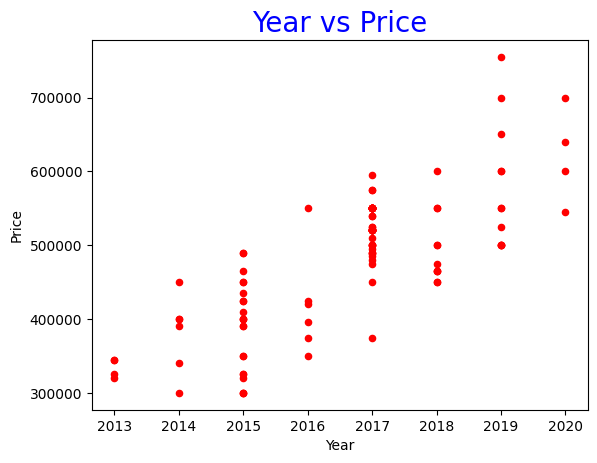

In [10]:
# scatter plot==>Year vs Price

car.plot(kind="scatter",x="Year",y="Price",color='red')
plt.title('Year vs Price',color='blue',fontsize=20)

The basic purpose of this plotting data points on a scatter plot chart to find the linear relationship between variables, if the linear relationship found between these variables then we will use the Linear Regression Model.
In this scenario, there is a linear relationship between year and mangoes_price because price of mangoes increased with the passage of time.

<Axes: xlabel='Year'>

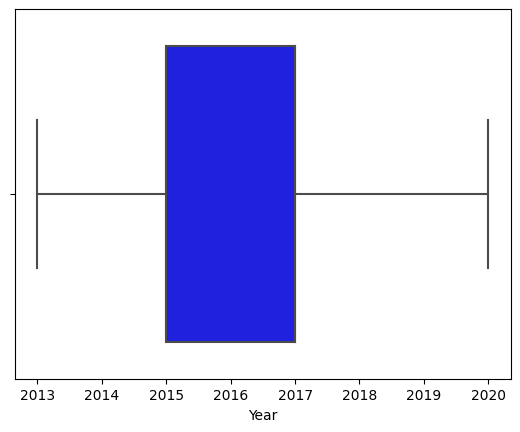

In [11]:
## outlier analysis
sns.boxplot(x=car['Year'],color='b')

In [25]:
#Before creating a linear model, we will create a new data frame in which we will drop a column (mangoes_price) as the linear model except for 2-D array.

new_df =car.drop('Price',axis='columns')
new_df

,Year
0,2018
1,2019
2,2019
3,2018
4,2018
...,...
107,2016
108,2014
109,2015
110,2016


In [26]:
# check the price of car
car_price=car.Price
car_price


0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64

In [28]:
#In order to train the model, i will create an object of Linear Regression class and call a fit() method
from sklearn import linear_model
reg_model = linear_model.LinearRegression()
reg_model.fit(new_df,car.Price)

LinearRegression()

In [29]:
## i will predict price of car in the year 2022
reg_model.predict([[2022]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([715488.07850976])

In [30]:
## Now,  manually i check the model how it is being predicted this value. Therefore, i will find the slope (coefficient) and intercept

reg_model.coef_

array([43453.37988793])

In [31]:
reg_model.intercept_

-87147246.05488417

As we already know, y = mx + b, where, ‘m’ is a slope and ‘b’ is an intercept. Hence, after putting the values of coefficient and intercept in the above equation and obtained an equal value of car in year 2022 that our model has already predicted

In [32]:
2022*43453.37988793 +(-87147246.05488417)

715488.0785102993

our linear model work good now check accuracy

In [33]:
reg_model.score(new_df,car_price)

0.6026450104600283

In [34]:
car = pd.read_csv('/content/car_age_price.csv')

LASSO regression, also known as L1 regularization, is a popular technique used in statistical modeling and machine learning to estimate the relationships between variables and make predictions.

 A model built with linear regression

In [45]:
## assign feature variable as x and target variable as y
X=car['Year']
y=car['Price']


In [54]:
# split the datset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [56]:
X_test.head()

40    2019
65    2017
4     2018
47    2018
42    2018
Name: Year, dtype: int64

In [57]:
y_train.head()

66    525000
90    520000
62    540000
22    434999
85    320000
Name: Price, dtype: int64

built a linear model

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection

In [66]:
print (X_train.shape, X_test.shape)
print (y_train.shape, y_test.shape)

(89,) (23,)
(89,) (23,)


In [70]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train.values.reshape(-1,1), y_train)

In [71]:
print(lm.intercept_,lm.coef_)


-95520922.49198586 [47608.56780808]


In [77]:
## calculate manually
47608.56*2022+-95520922


743586.3199999928

In [72]:
x_new=pd.DataFrame({'Year':[2022]})
x_new.head()

,Year
0,2022


In [73]:
new_pred=lm.predict(x_new)
new_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([743601.61594504])

linear regression performing good